In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata
from matplotlib.gridspec import GridSpec
import struct
from matplotlib.patches import Circle, PathPatch


V = np.genfromtxt("Meshdata/VerticesRing8.txt")
T = np.genfromtxt("Meshdata/FacesRing8.txt")

n_v = len(V)
n_t = len(T)

#for i in range(0, n_t , 1):
#        for j in range( 0, 3 , 1):
#                k = int(T[i][j])
#                l = int(T[i][(j+1)%3])
#                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black', alpha=0.4)
#for i in range(0,n_v,1):
#    plt.scatter(V[i][0],V[i][1], color='r', marker='o')
#plt.show()



Sol = np.genfromtxt("Solutions/PoissonSolutionRing8.txt")

In [67]:
def InterpolationPlot( Vertices , Values, Title, Triangulation):
    #define grid
    xi = np.linspace(0.,1.,1001)
    yi = np.linspace(0.,1.,1001)
    # grid the data
    zi = griddata( Vertices , Values, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS1 = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS2 = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet,alpha=0.5)
    plt.clabel(CS1, inline=True)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(V[::,:1:],V[::,1::],marker='o',c='b',s=10,alpha=.5)
    for i in range(0, len(Triangulation) , 1):
        for j in range( 0, 3 , 1):
                k = int(Triangulation[i][j])
                l = int(Triangulation[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='grey',alpha=0.3)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(Title)



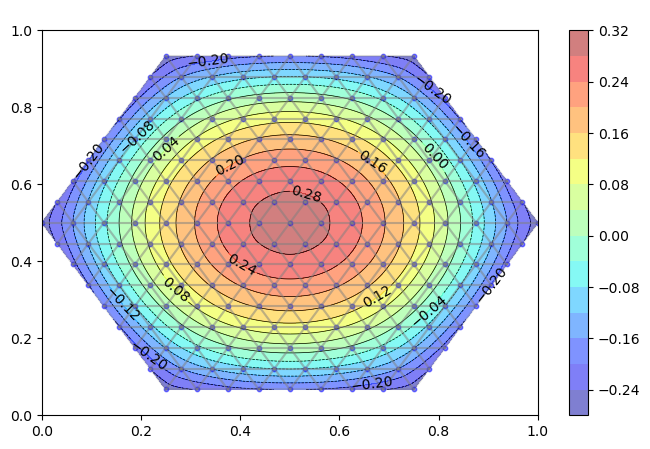

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
InterpolationPlot( V , Sol , " ", T)

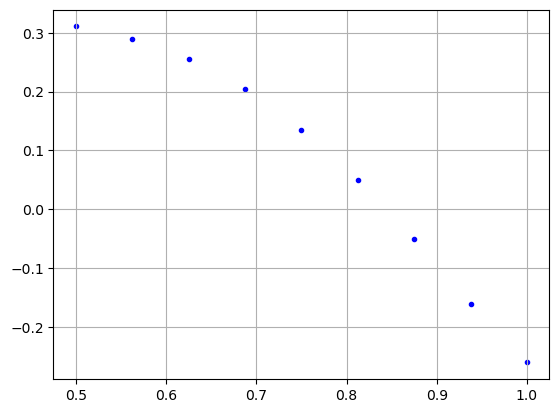

In [70]:
RadialValues = []
for i in range(0,len(V)):
    if( V[i][1]==0.5 and V[i][0]>=0.5 ):
        RadialValues.append( (V[i][0] , Sol[i]) )

X = np.linspace(0.5,1.,100)
plt.grid()
#plt.ylim(-7.1,5.5)
for i in range(0, len(RadialValues)):
    plt.scatter( RadialValues[i][0], RadialValues[i][1], c='b', marker='.')
#plt.plot(X, -2.*np.log((X-.5)), c='r')
plt.show()

Val = np.array(RadialValues)